# Setup 

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

In [271]:
X, y = datasets.make_blobs(random_state = 14) 

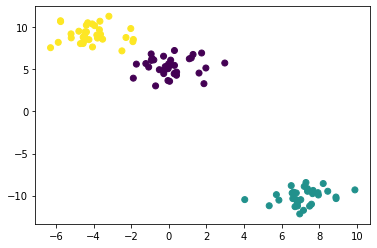

In [272]:
#this is an unsupervised algorithm, we dont really need to show the clusters' y value, but just for clarity
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

# K-Means 

Centroids updated after getting all values closest to them, repeated until convergence.

In [273]:
def calc_new_centroid(X, clust_elems, index):
    res = [np.mean(X[clust_elems.get(index),0]), np.mean(X[clust_elems.get(index),1])]
    return res

In [274]:
def euclidean(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2) 

In [281]:
c = 3
n_iter = 5
random.seed(3)

random_init = [random.choice(range(len(X))),random.choice(range(len(X))),random.choice(range(len(X)))]
centroids = [X[random_init[0],:],
             X[random_init[1],:],
             X[random_init[2],:]]
centroids

[array([-1.22230175,  5.67441049]),
 array([-3.66292879, 10.69759846]),
 array([-4.47581053,  8.99035453])]

In [282]:
cluster_elements = {
                0:[random_init[0]],
                1:[random_init[1]],
                2:[random_init[2]]}

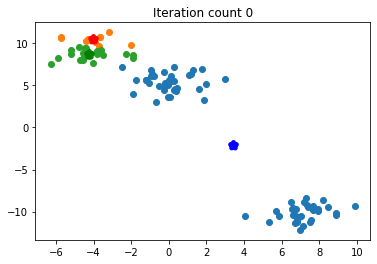

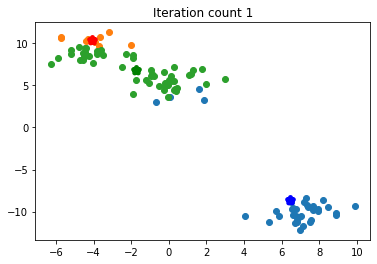

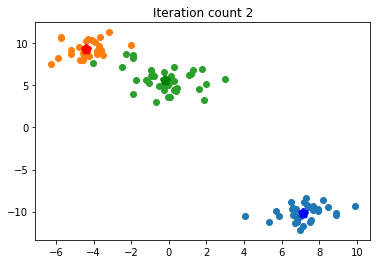

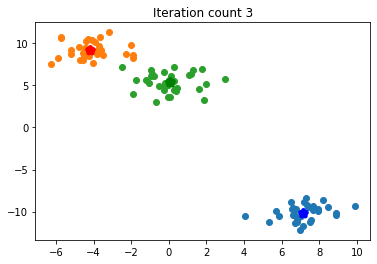

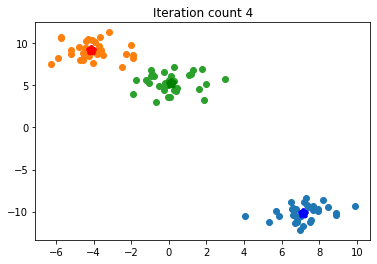

In [283]:
for iter_count in range(n_iter):
    
    #check all points
    for i in range(len(X)):
        #look for min value and cluster
        min_distance = np.inf
        cent_idx = -1

        #for every element check the distance to all existing centroids
        for k in range(c):
            distance = euclidean(X[i], centroids[k])
            if distance < min_distance:
                cent_idx = k
                min_distance = distance

        #assigns element index to its closest centroid
        cluster_elements.get(cent_idx).append(i)

    #recalculate centroid
    centroids[0] = calc_new_centroid(X, cluster_elements, 0)
    centroids[1] = calc_new_centroid(X, cluster_elements, 1)
    centroids[2] = calc_new_centroid(X, cluster_elements, 2)
    
    #viz
    plt.scatter(X[cluster_elements.get(0),0],X[cluster_elements.get(0),1])
    plt.scatter(X[cluster_elements.get(1),0],X[cluster_elements.get(1),1])
    plt.scatter(X[cluster_elements.get(2),0],X[cluster_elements.get(2),1])
    plt.scatter(centroids[0][0], centroids[0][1], c = "blue", marker = "*", linewidths = 5)
    plt.scatter(centroids[1][0], centroids[1][1], c = "red", marker = "*", linewidths = 5)
    plt.scatter(centroids[2][0], centroids[2][1], c = "green", marker = "*", linewidths = 5)
    plt.title(f"Iteration count {iter_count}")
    plt.show()

    #reset points to clusters
    cluster_elements = {
                0:[],
                1:[],
                2:[]}